In [ ]:
%matplotlib inline

import pandas as pd


In [ ]:
m_movies="https://raw.githubusercontent.com/190100113/project/main/m_movies.csv"
m_ratings="https://raw.githubusercontent.com/190100113/project/main/m_ratings.csv"
b_books="https://raw.githubusercontent.com/190100113/project/main/b_books.csv"
b_ratings="https://raw.githubusercontent.com/190100113/project/main/b_ratings.csv"


In [ ]:

m_movies = pd.read_csv(m_movies)
m_ratings = pd.read_csv(m_ratings)
b_books=pd.read_csv(b_books)
b_ratings=pd.read_csv(b_ratings)

In [ ]:
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
m_movies.head

<bound method NDFrame.head of       movieId                                      title
0           1                           Toy Story (1995)
1           2                             Jumanji (1995)
2           3                    Grumpier Old Men (1995)
3           4                   Waiting to Exhale (1995)
4           5         Father of the Bride Part II (1995)
...       ...                                        ...
9737   193581  Black Butler: Book of the Atlantic (2017)
9738   193583               No Game No Life: Zero (2017)
9739   193585                               Flint (2017)
9740   193587        Bungo Stray Dogs: Dead Apple (2018)
9741   193609        Andrew Dice Clay: Dice Rules (1991)

[9742 rows x 2 columns]>

In [ ]:
m_ratings.head

<bound method NDFrame.head of         userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]>

In [ ]:
b_books.head


<bound method NDFrame.head of       book_id                                     original_title
0           1                                   The Hunger Games
1           2           Harry Potter and the Philosopher's Stone
2           3                                           Twilight
3           4                              To Kill a Mockingbird
4           5                                   The Great Gatsby
...       ...                                                ...
9995     9996                                         Bayou Moon
9996     9997                                   Means of Ascent 
9997     9998                              The Mauritius Command
9998     9999  Cinderella Ate My Daughter: Dispatches from th...
9999    10000                                The First World War

[10000 rows x 2 columns]>

In [ ]:
b_ratings.head

<bound method NDFrame.head of          user_id  book_id  rating
0              1      258       5
1              2     4081       4
2              2      260       5
3              2     9296       5
4              2     2318       3
...          ...      ...     ...
1048570    16290      119       2
1048571     7453       13       5
1048572     7453       58       5
1048573     7453      706       5
1048574     7453     1178       5

[1048575 rows x 3 columns]>

In [ ]:
b_books["book_id"]+=193610

In [ ]:
b_ratings["book_id"]+=193610


In [ ]:
b_ratings["user_id"]+=611

In [ ]:
b_ratings

,user_id,book_id,rating
0,612,193868,5
1,613,197691,4
2,613,193870,5
3,613,202906,5
4,613,195928,3
...,...,...,...
1048570,16901,193729,2
1048571,8064,193623,5
1048572,8064,193668,5
1048573,8064,194316,5


In [ ]:
mapping = {b_ratings.columns[0]: 'userId', b_ratings.columns[1]: 'movieId',b_ratings.columns[2]:"rating"}
b_ratings=b_ratings.rename(columns=mapping)

In [ ]:
mapping = {b_books.columns[0]: 'movieId', b_books.columns[1]: 'title'}
b_books=b_books.rename(columns=mapping)

In [ ]:
b_books.head

<bound method NDFrame.head of       movieId                                              title
0      193611                                   The Hunger Games
1      193612           Harry Potter and the Philosopher's Stone
2      193613                                           Twilight
3      193614                              To Kill a Mockingbird
4      193615                                   The Great Gatsby
...       ...                                                ...
9995   203606                                         Bayou Moon
9996   203607                                   Means of Ascent 
9997   203608                              The Mauritius Command
9998   203609  Cinderella Ate My Daughter: Dispatches from th...
9999   203610                                The First World War

[10000 rows x 2 columns]>

In [ ]:
b_books.dropna(inplace=True)

In [ ]:
b_ratings.head

<bound method NDFrame.head of          userId  movieId  rating
0           612   193868       5
1           613   197691       4
2           613   193870       5
3           613   202906       5
4           613   195928       3
...         ...      ...     ...
1048570   16901   193729       2
1048571    8064   193623       5
1048572    8064   193668       5
1048573    8064   194316       5
1048574    8064   194788       5

[1048575 rows x 3 columns]>

(array([611779., 136608.,  77706.,  57732.,  41872.,  35085.,  27797.,
         22054.,  20708.,  17234.]),
 array([193611. , 194610.9, 195610.8, 196610.7, 197610.6, 198610.5,
        199610.4, 200610.3, 201610.2, 202610.1, 203610. ]),
 <a list of 10 Patch objects>)

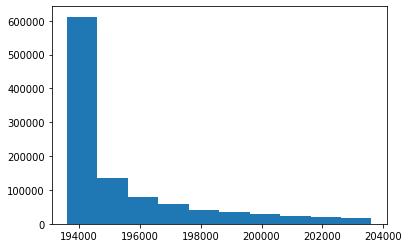

In [ ]:
plt.hist(b_ratings["movieId"])

In [ ]:
b_ratings["rating"]=b_ratings["rating"].astype(float)

In [ ]:
b_ratings["rating"]

0          5.0
1          4.0
2          5.0
3          5.0
4          3.0
          ... 
1048570    2.0
1048571    5.0
1048572    5.0
1048573    5.0
1048574    5.0
Name: rating, Length: 1048575, dtype: float64

In [ ]:
titles=m_movies.append(b_books[['movieId', 'title']])
ratings=m_ratings.append(b_ratings[["userId","movieId","rating"]])

In [ ]:
titles.head

<bound method NDFrame.head of       movieId                                              title
0           1                                   Toy Story (1995)
1           2                                     Jumanji (1995)
2           3                            Grumpier Old Men (1995)
3           4                           Waiting to Exhale (1995)
4           5                 Father of the Bride Part II (1995)
...       ...                                                ...
9995   203606                                         Bayou Moon
9996   203607                                   Means of Ascent 
9997   203608                              The Mauritius Command
9998   203609  Cinderella Ate My Daughter: Dispatches from th...
9999   203610                                The First World War

[19157 rows x 2 columns]>

In [ ]:
ratings.head

<bound method NDFrame.head of          userId  movieId  rating
0             1        1     4.0
1             1        3     4.0
2             1        6     4.0
3             1       47     5.0
4             1       50     5.0
...         ...      ...     ...
1048570   16901   193729     2.0
1048571    8064   193623     5.0
1048572    8064   193668     5.0
1048573    8064   194316     5.0
1048574    8064   194788     5.0

[1149411 rows x 3 columns]>

In [ ]:
len(ratings["userId"].unique())

13733

In [ ]:
len(ratings["movieId"].unique())

17498

In [ ]:
len(titles["movieId"].unique())

19157

In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,16848,16849,16850,16851,16853,16854,16855,16856,16857,16858,16859,16863,16866,16867,16870,16871,16873,16874,16876,16878,16879,16882,16883,16884,16885,16886,16890,16891,16893,16895,16896,16897,16898,16900,16901,22962,25031,37687,42572,42819
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,16848,16849,16850,16851,16853,16854,16855,16856,16857,16858,16859,16863,16866,16867,16870,16871,16873,16874,16876,16878,16879,16882,16883,16884,16885,16886,16890,16891,16893,16895,16896,16897,16898,16900,16901,22962,25031,37687,42572,42819
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

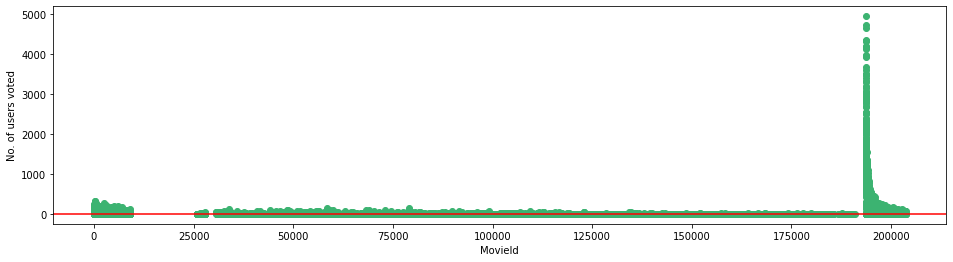

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

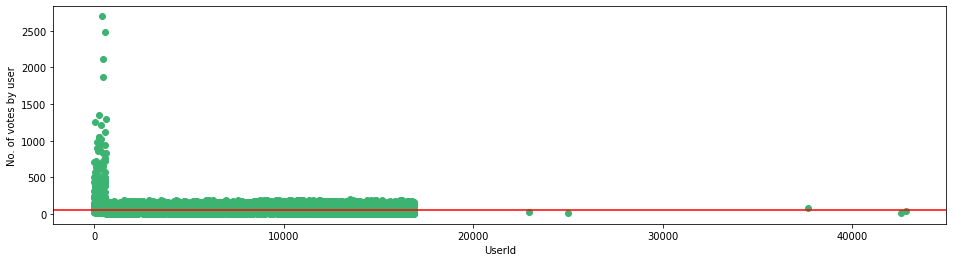

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,19,20,21,22,23,24,27,28,29,32,33,34,36,38,39,40,41,42,43,45,47,50,51,52,57,58,59,62,63,64,...,16811,16812,16813,16815,16816,16818,16819,16822,16824,16826,16827,16830,16831,16833,16834,16835,16843,16845,16846,16848,16850,16851,16853,16854,16855,16856,16858,16863,16866,16871,16873,16874,16883,16884,16885,16886,16896,16897,16901,37687
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,4.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.5,0.0,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (8816, 3543)	3.0
  (8816, 4695)	3.0
  (8816, 4787)	2.0
  (8816, 5729)	4.0
  (8816, 5945)	3.0
  (8816, 6800)	4.0
  (8816, 7151)	2.0
  (8816, 7789)	4.0
  (8816, 8214)	3.0
  (8816, 8216)	4.0
  (8816, 8699)	5.0
  (8817, 628)	4.0
  (8817, 921)	5.0
  (8817, 1596)	5.0
  (8817, 2344)	4.0
  (8817, 4172)	4.0
  (8817, 4625)	4.0
  (8817, 5482)	5.0
  (8817, 5750)	4.0
  (8817, 5844)	3.0
  (8817, 6333)	3.0
  (8817, 7821)	4.0
  (8817, 8351)	4.0
  (8817, 8394)	5.0
  (8817, 9814)	5.0


In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    
    n_movies_to_reccomend = 10
    movie_list = titles[titles['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = titles[titles['movieId'] == movie_idx].index
            recommend_frame.append({'Title':titles.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [ ]:
get_movie_recommendation('Memento')

,Title,Distance
1,American Beauty (1999),0.389346
2,American History X (1998),0.388615
3,Pulp Fiction (1994),0.386235
4,"Lord of the Rings: The Return of the King, The...",0.371622
5,Kill Bill: Vol. 1 (2003),0.350167
6,"Lord of the Rings: The Two Towers, The (2002)",0.348358
7,Eternal Sunshine of the Spotless Mind (2004),0.346196
8,"Matrix, The (1999)",0.326215
9,"Lord of the Rings: The Fellowship of the Ring,...",0.316777
10,Fight Club (1999),0.272380


In [ ]:
get_movie_recommendation('')

,Title,Distance
1,Groundhog Day (1993),0.399495
2,"Lion King, The (1994)",0.398578
3,Pulp Fiction (1994),0.398293
4,Star Wars: Episode VI - Return of the Jedi (1983),0.390663
5,Apollo 13 (1995),0.384633
6,Shrek (2001),0.381472
7,Star Wars: Episode IV - A New Hope (1977),0.380789
8,Toy Story 2 (1999),0.371637
9,Forrest Gump (1994),0.356542
10,Jurassic Park (1993),0.334884
